In [77]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt


In [70]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self,t):
        velocity_noise = None
        accel = None
        cruise = None
        decel = None
        idle = None
        t_DP = None
        self.t = t
        self.y = None

    def subtract_avg(self, y):
        """Removes the average speed from the observations
        """
        self.y = y - y.mean()
        return y - y.mean()
     

    def fnc2min(self, params):
        """ Returns the residuals for the model
        """

        A_FS = params['A_FS']
        w_FS = params['w_FS']
        gamma_FS = params['gamma_FS']

        model = np.array(A_FS * np.sin( (w_FS*self.t) + gamma_FS ))

        return (self.y - model)

    def NLLSR(self, LMparams, t, yNoisy):
        """ Returns the result of the NLLSR using LMFit
        """
        LMFitmin = Minimizer(self.fnc2min, LMparams, fcn_args=(t, yNoisy))
        LMFitResult = LMFitmin.minimize(method='least_squares')
        # LSOptimResult = least_squares(self.fnc2min, InitialParams, method='lm', args=(variables, yNoisy))

        return LMFitResult

    def LF_Noise(self):
        """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0, max = 0.01*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    def MF_Noise(self):
        """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0.01, max = 0.25*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    def HF_Noise(self):
        """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
        """
        LMparams = Parameters()
        LMparams.add('A_FS', value = 1.)
        LMparams.add('w_FS', value = 1., min = 0.25, max = 0.5*2*math.pi)
        LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)



    def velocity_noise(self):
        A_FS = Symbol('A/_FS')
        print(Ai_FS)
        #EQN 5
        y_FS[t] = Sum(A_FS[i]*sin(w_FS[i][t]+gamma_FS[i]), (i, 1, 3))

        pass


In [27]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


/Users/koeboonshyang/Documents/GitHub/MEng-V2I


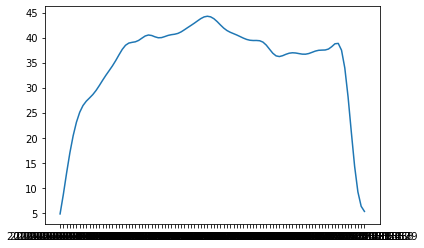

<class 'numpy.ndarray'>


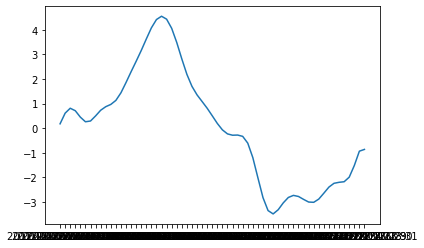

TypeError: unsupported operand type(s) for *: 'float' and 'generator'

In [75]:
if __name__ == '__main__':
    LMparams = Parameters()
    LMparams.add('A_FS', value = 1.)
    LMparams.add('w_FS', value = 1., min = 0, max = 0.01*2*math.pi)
    LMparams.add('gamma_FS', value = 1., min = -math.pi, max = math.pi)

    dp_obj = DP()

    # print(os.getcwd())
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long cruising period
    data = data.iloc[1002:1096,:]
    data.reindex()
    # print(data)
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = dp_obj.subtract_avg(cruising_data.loc[:,'speed_mph']).to_numpy()
    # create a list of just t values starting at t=1
    t = np.array(i+1 for i in range(len(cruising_data)))
    print(type(t))
    plt.plot(cruising_data.loc[:,'timestamp'], y)
    plt.show()
    # perform NLLSR on the first values with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LMparams, t, y)
    #prints the parameters of the result
    print(hi.params)

    plt.plot(t,y,'b')
    plt.plot(t, dp_obj.fnc2min(hi.params,t,y),'r', label = 'best_fit')
    plt.show()

    # perform NLLSR on the first values with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LMparams, t[1], y[1])
    #prints the parameters of the result
    print(hi.params)




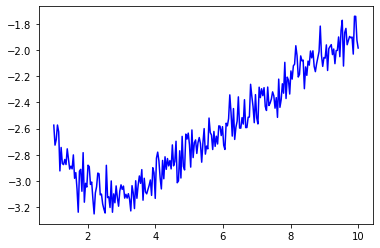

In [78]:
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0 * np.exp(-x / 2) - 5.0 * np.exp(-(x - 0.1) / 10.) + 0.1 * np.random.randn(x.size)
plt.plot(x, y, 'b')
plt.show()

In [80]:
import lmfit
p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3., True))

def residual(p):
    v = p.valuesdict()
    return v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y


mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)

[[Variables]]
    a1:  2.98623689 (init = 4)
    a2: -4.33525597 (init = 4)
    t1:  1.30993186 (init = 3)
    t2:  11.8240752 (init = 3)


In [ ]:
plt.plot(x, y, 'b')
plt.plot(x, residual(mi.params) + y, 'r', label='best fit')
plt.legend(loc='best')
plt.show()